In [50]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [51]:
!kaggle datasets download -d techsash/waste-classification-data

 97% 413M/427M [00:06<00:00, 116MB/s] 
100% 427M/427M [00:06<00:00, 73.2MB/s]


In [52]:
!unzip waste-classification-data.zip -d datasets

Streaming output truncated to the last 5000 lines.
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: datasets/dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflati

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [54]:
path = '/content/datasets/dataset/DATASET'

In [55]:

import os

In [56]:

kategori = os.listdir(path)
kategori

['TEST', 'TRAIN']

## **Mengatur path dataset menjadi 3 train, val, test**

In [57]:
train_dir = '/content/datasets/dataset/DATASET'
validation_dir = '/content/datasets/dataset/DATASET'
test_dir = '/content/datasets/dataset/DATASET'

## **Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data**

In [58]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [59]:

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## **Split dataset menjadi train, val, dan test**

Data Train

In [60]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 25077 images belonging to 2 classes.


Data val

In [61]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 25077 images belonging to 2 classes.


Data Test

In [62]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 25077 images belonging to 2 classes.


Membuat model sequential

In [63]:

model = Sequential()

Menggunakan pre-trained model VGG16

In [64]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Menggunakan optimizer, loss, dan metrics

In [65]:

model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Callbacks

In [66]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

Latih Model

In [68]:
history = model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/2
784/784 [==============================] - 230s 293ms/step - loss: 0.2614 - accuracy: 0.9128 - val_loss: 0.2356 - val_accuracy: 0.9203 - lr: 0.0010
Epoch 2/2
784/784 [==============================] - 253s 323ms/step - loss: 0.2519 - accuracy: 0.9138 - val_loss: 0.2315 - val_accuracy: 0.9211 - lr: 0.0010


Evaluasi model

In [69]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

784/784 [==============================] - 54s 68ms/step - loss: 0.2315 - accuracy: 0.9211
Akurasi pada data test: 0.92


Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

Grafik Accuracy

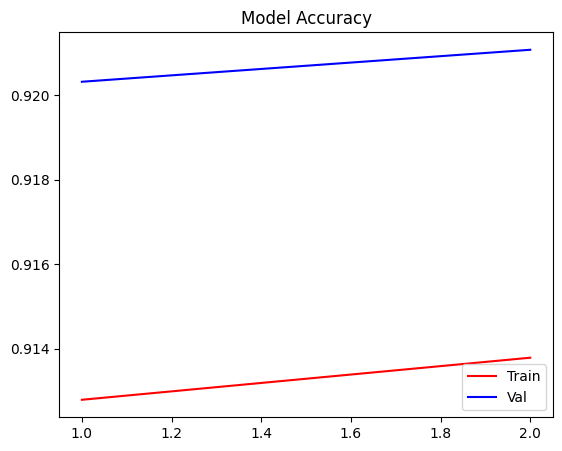

In [71]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

Grafik Loss

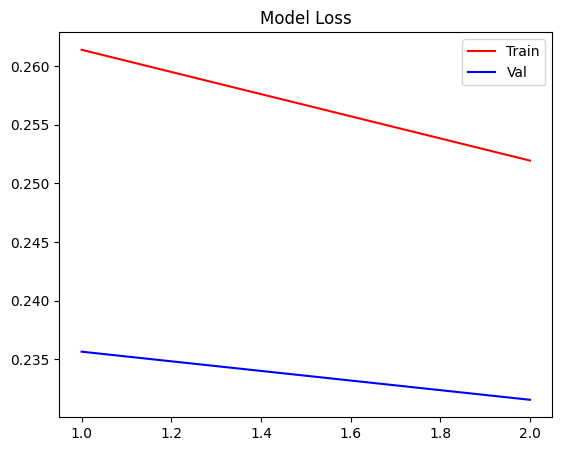

In [72]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

In [74]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [79]:
path_gambar = '/content/datasets/DATASET/TEST/O/O_12568.jpg'

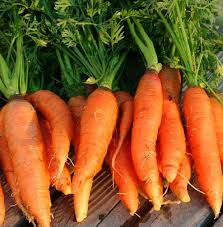

In [80]:
image = load_img(path_gamabar)
image

In [81]:
brigth = random_brightness(image, max_delta=5)

Text(0.5, 1.0, 'gambar sebelum argumentasi')

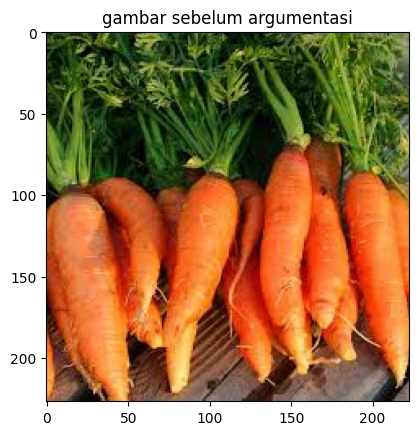

In [82]:
plt.imshow(image)
plt.title('gambar sebelum argumentasi')